In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Path to your Excel file
excel_file = '/home/ulaval.ca/lesee/projects/Project-NLST/results/ML-NLST-results.xlsx'

# Load all sheets into a dictionary of dataframes
xl = pd.ExcelFile(excel_file)
sheets = xl.sheet_names
dataframes = {sheet: xl.parse(sheet) for sheet in sheets}


In [4]:
max_auc_per_category = {}

for sheet, df in dataframes.items():
    # Assuming 'Category' and 'AUC' columns exist
    max_auc = df.groupby('Category')['AUC_test'].max()
    max_auc_per_category[sheet] = max_auc


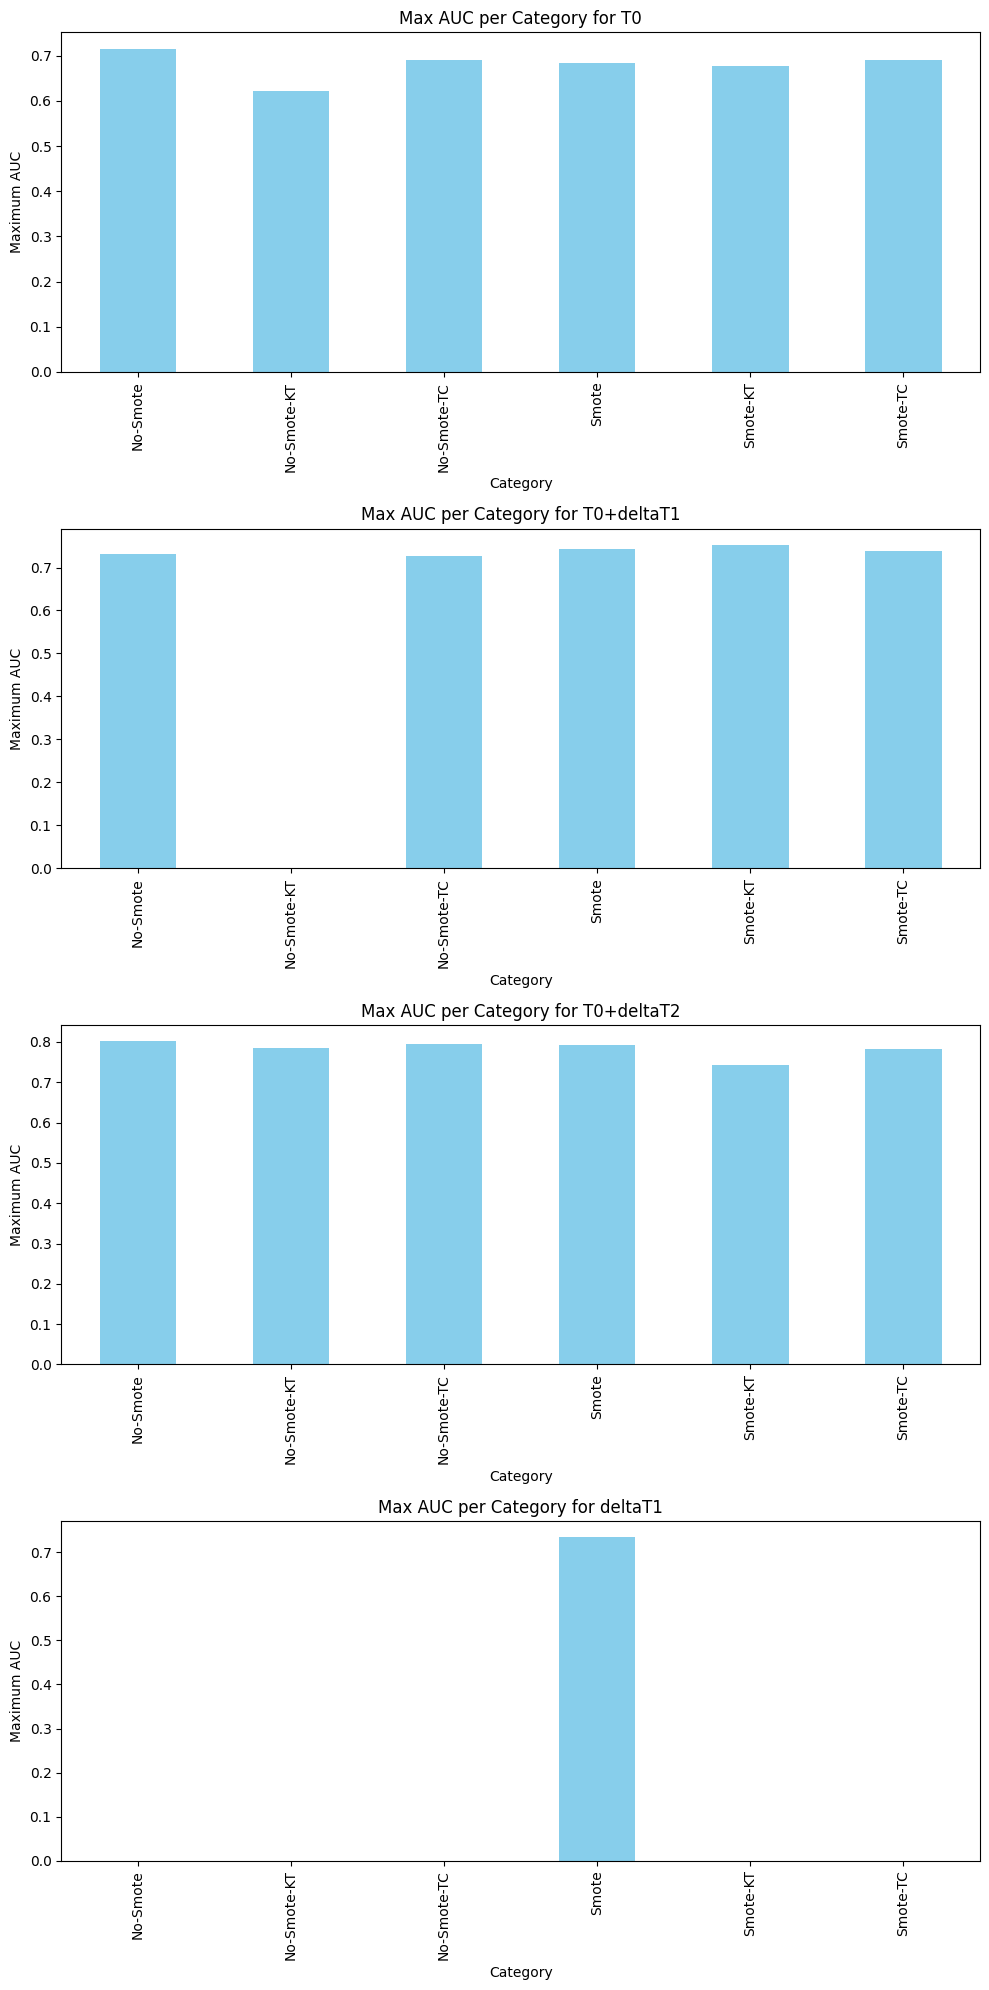

In [5]:
# Create a figure with subplots - one for each sheet
fig, axes = plt.subplots(nrows=len(max_auc_per_category), figsize=(10, 5 * len(max_auc_per_category)))

if not isinstance(axes, np.ndarray):
    axes = [axes]

for ax, (sheet, max_auc) in zip(axes, max_auc_per_category.items()):
    # Create bar chart
    max_auc.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Max AUC per Category for {sheet}')
    ax.set_ylabel('Maximum AUC')
    ax.set_xlabel('Category')

plt.tight_layout()
plt.show()
